In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [2]:
data=pd.read_csv("electricity.csv")

In [3]:
data.head()

,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0
1,2005-12-31 02:00:00,1377.0
2,2005-12-31 03:00:00,1351.0
3,2005-12-31 04:00:00,1336.0
4,2005-12-31 05:00:00,1356.0


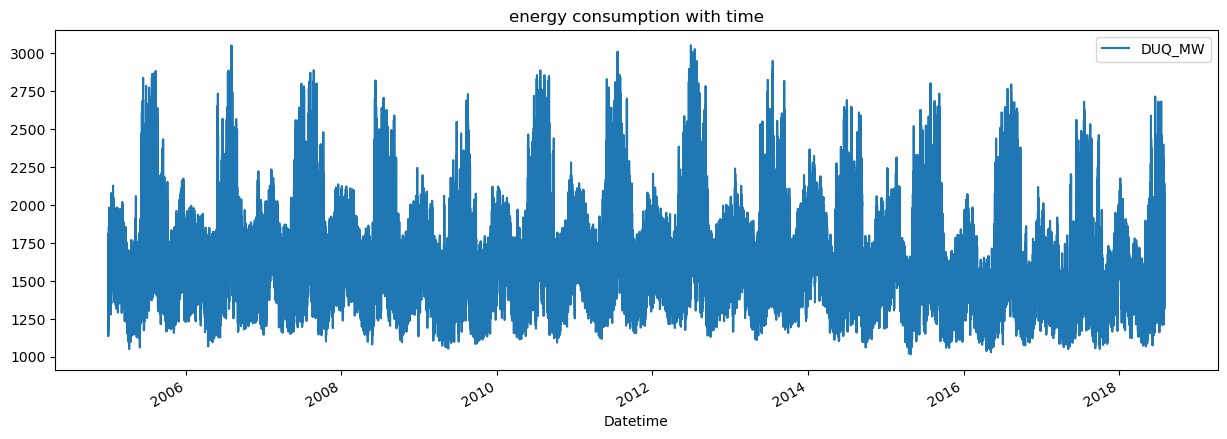

In [27]:
data.plot(title="energy consumption with time",figsize=(15,5))
plt.show()

In [17]:
data.index=pd.to_datetime(data.index)

In [32]:
train=data[data.index<"01-01-2015"]
test=data[data.index>="01-01-2015"]

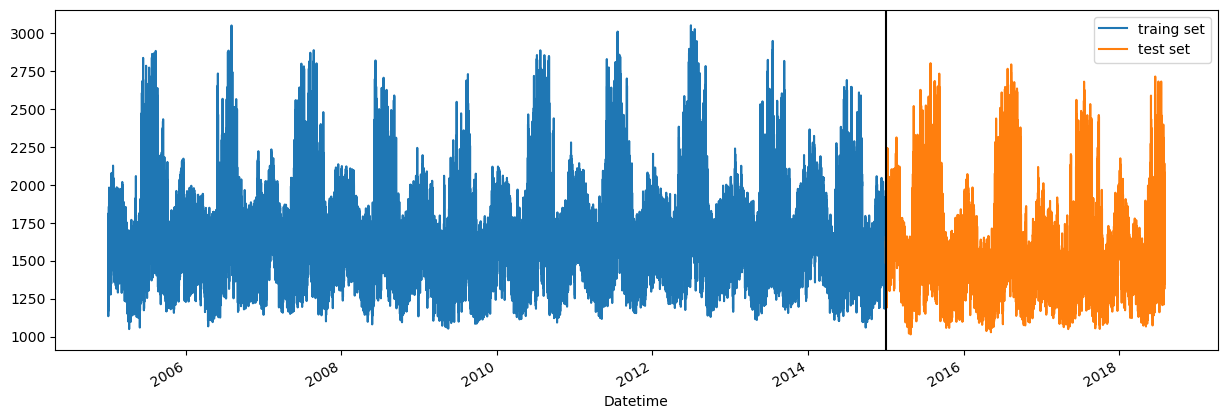

In [40]:
fig,ax=plt.subplots(figsize=(15,5))
train.plot(ax=ax,label="training set")
test.plot(ax=ax,label="test set")
ax.axvline("01-01-2015",color="black")
ax.legend(["traing set","test set"])
plt.show()

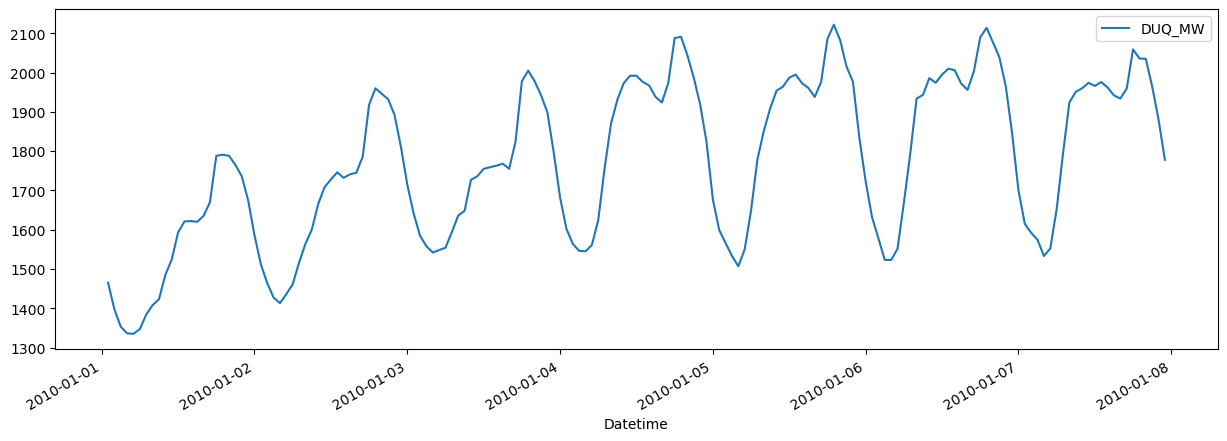

In [47]:
week_data=data[(data.index>"01-01-2010") & (data.index<"01-08-2010")]
week_data.plot(figsize=(15,5),label="one week consumption")
plt.show()

In [70]:
def create_features(train):
    train["hour"]=train.index.hour
    train["day_of_week"]=train.index.day_of_week
    train["quarter"]=train.index.quarter
    train["month"]=train.index.month
    train["year"]=train.index.year
    train["dayofyear"]=train.index.dayofyear
    return train

In [71]:
create_features(test)

C:\Users\USER\AppData\Local\Temp\ipykernel_8392\427462356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["hour"]=train.index.hour
C:\Users\USER\AppData\Local\Temp\ipykernel_8392\427462356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["day_of_week"]=train.index.day_of_week
C:\Users\USER\AppData\Local\Temp\ipykernel_8392\427462356.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,DUQ_MW,hour,day_of_week,quarter,month,year,dayofyear
Datetime,,,,,,,
2015-01-01 00:00:00,1656.0,0,3,1,1,2015,1
2015-12-31 01:00:00,1321.0,1,3,4,12,2015,365
2015-12-31 02:00:00,1276.0,2,3,4,12,2015,365
2015-12-31 03:00:00,1243.0,3,3,4,12,2015,365
2015-12-31 04:00:00,1240.0,4,3,4,12,2015,365
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,1962.0,20,0,1,1,2018,1
2018-01-01 21:00:00,1940.0,21,0,1,1,2018,1
2018-01-01 22:00:00,1891.0,22,0,1,1,2018,1


In [74]:
create_features(data)

,DUQ_MW,hour,day_of_week,quarter,month,year,dayofyear
Datetime,,,,,,,
2005-12-31 01:00:00,1458.0,1,5,4,12,2005,365
2005-12-31 02:00:00,1377.0,2,5,4,12,2005,365
2005-12-31 03:00:00,1351.0,3,5,4,12,2005,365
2005-12-31 04:00:00,1336.0,4,5,4,12,2005,365
2005-12-31 05:00:00,1356.0,5,5,4,12,2005,365
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,1962.0,20,0,1,1,2018,1
2018-01-01 21:00:00,1940.0,21,0,1,1,2018,1
2018-01-01 22:00:00,1891.0,22,0,1,1,2018,1


<AxesSubplot:xlabel='hour', ylabel='DUQ_MW'>

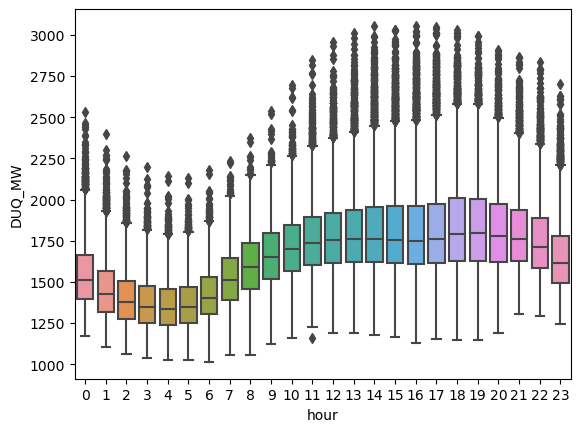

In [102]:
sns.boxplot(data=data,x="hour",y="DUQ_MW")

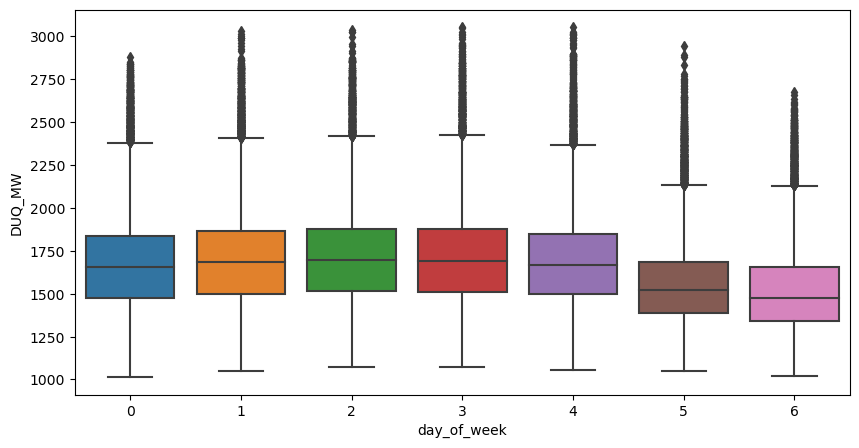

In [103]:
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=data,x="day_of_week",y="DUQ_MW")
plt.show()

<AxesSubplot:xlabel='quarter', ylabel='DUQ_MW'>

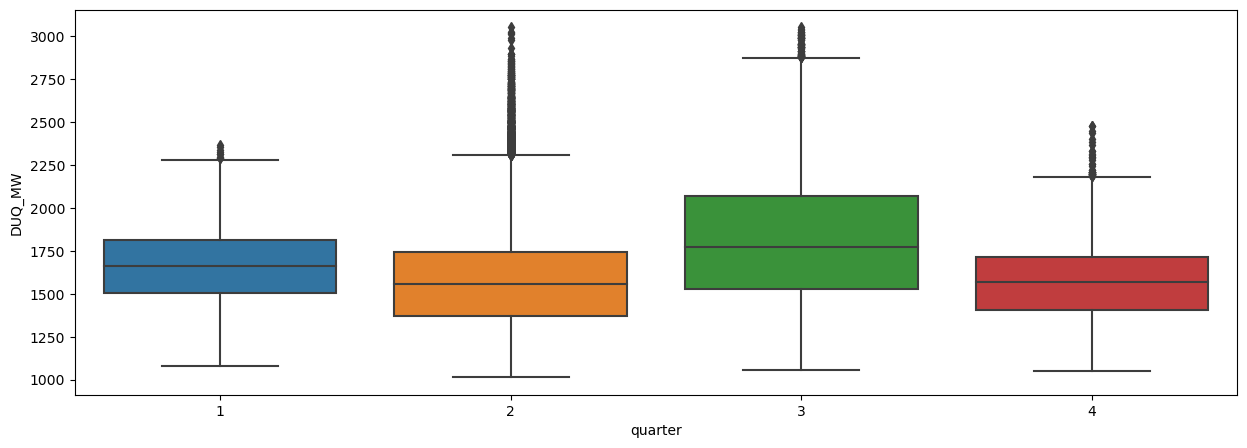

In [105]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=data,x="quarter",y="DUQ_MW")


<AxesSubplot:xlabel='month', ylabel='DUQ_MW'>

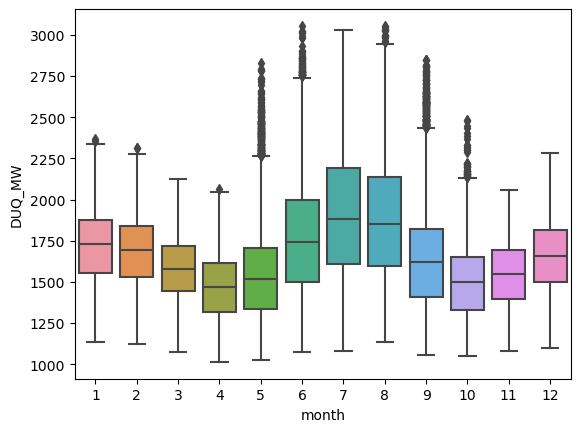

In [100]:
sns.boxplot(data=data,x="month",y="DUQ_MW")

<AxesSubplot:xlabel='year', ylabel='DUQ_MW'>

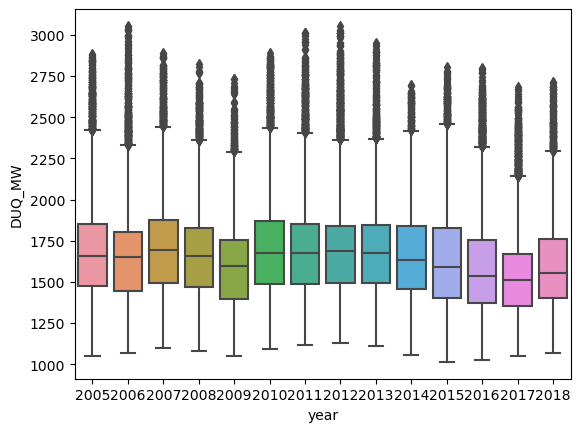

In [98]:
sns.boxplot(data=data,x="year",y="DUQ_MW")

In [107]:
from sklearn.metrics import mean_squared_error

In [123]:
Features=list(train.columns.drop(["DUQ_MW"]))
TARGET=["DUQ_MW"]
X_train=train[Features]
y_train=train[TARGET]
X_test=test[Features]
y_test=test[TARGET]

In [141]:
reg=xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50,learning_rate=0.01)
reg.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],verbose=True)

[0]	validation_0-rmse:1691.24467	validation_1-rmse:1603.93852
[1]	validation_0-rmse:1674.50828	validation_1-rmse:1587.16678
[2]	validation_0-rmse:1657.93968	validation_1-rmse:1570.56533
[3]	validation_0-rmse:1641.54028	validation_1-rmse:1554.13502
[4]	validation_0-rmse:1625.30406	validation_1-rmse:1537.76570
[5]	validation_0-rmse:1609.23242	validation_1-rmse:1521.66293
[6]	validation_0-rmse:1593.32234	validation_1-rmse:1505.72596
[7]	validation_0-rmse:1577.57305	validation_1-rmse:1489.95139
[8]	validation_0-rmse:1561.98298	validation_1-rmse:1474.23403
[9]	validation_0-rmse:1546.55200	validation_1-rmse:1458.77931
[10]	validation_0-rmse:1531.27590	validation_1-rmse:1443.47120
[11]	validation_0-rmse:1516.15379	validation_1-rmse:1428.22606
[12]	validation_0-rmse:1501.18648	validation_1-rmse:1413.23626
[13]	validation_0-rmse:1486.36908	validation_1-rmse:1398.28952
[14]	validation_0-rmse:1471.70064	validation_1-rmse:1383.60335
[15]	validation_0-rmse:1457.18091	validation_1-rmse:1368.96941
[1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [142]:
reg.feature_importances_

array([0.55589557, 0.22743379, 0.03551954, 0.0409271 , 0.0259484 ,
       0.11427556], dtype=float32)

<AxesSubplot:>

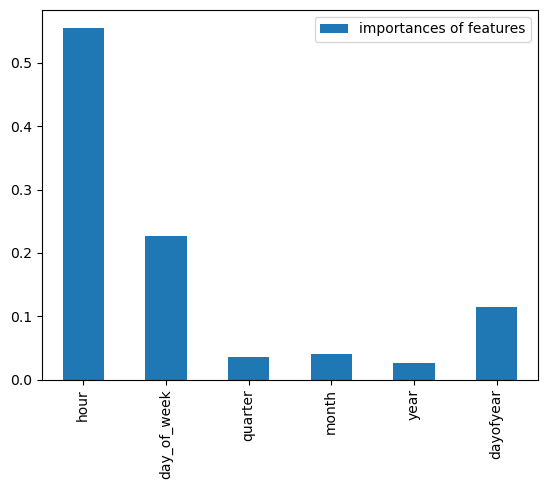

In [143]:
f_importance=pd.DataFrame(reg.feature_importances_,index=reg.feature_names_in_,columns=["importances of features"])
f_importance.plot(kind="bar")

In [163]:
test["predict"]=reg.predict(X_test)

C:\Users\USER\AppData\Local\Temp\ipykernel_8392\3178533236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predict"]=reg.predict(X_test)


In [176]:
data.head()

,DUQ_MW,hour,day_of_week,quarter,month,year,dayofyear,predict_x,predict_y,predict
Datetime,,,,,,,,,,
2005-01-01 01:00:00,1364.0,1,5,1,1,2005,1,NaN,NaN,NaN
2005-01-01 02:00:00,1273.0,2,5,1,1,2005,1,NaN,NaN,NaN
2005-01-01 03:00:00,1218.0,3,5,1,1,2005,1,NaN,NaN,NaN
2005-01-01 04:00:00,1170.0,4,5,1,1,2005,1,NaN,NaN,NaN
2005-01-01 05:00:00,1166.0,5,5,1,1,2005,1,NaN,NaN,NaN


C:\Users\USER\AppData\Local\Temp\ipykernel_8392\3489859177.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'predict_x'} in the result is deprecated and will raise a MergeError in a future version.
  data=data.merge(test[["predict"]],how="left",left_index=True,right_index=True)


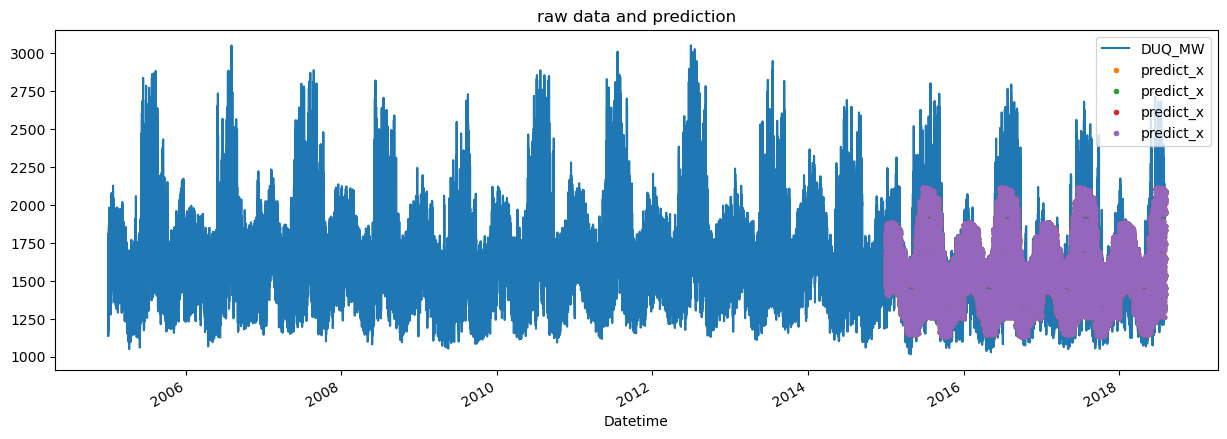

In [181]:
data=data.merge(test[["predict"]],how="left",left_index=True,right_index=True)
ax=data[["DUQ_MW"]].plot(figsize=(15,5))
ax.set_title("raw data and prediction")
data["predict_x"].plot(ax=ax,style='.')
plt.show()

In [183]:
np.sqrt(mean_squared_error(test["DUQ_MW"],test["predict"]))

181.51968342667598

In [187]:
test["error"]=np.abs(test["predict"]-test["DUQ_MW"])

C:\Users\USER\AppData\Local\Temp\ipykernel_8392\3161181143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["error"]=np.abs(test["predict"]-test["DUQ_MW"])


In [190]:
test["date"]=test.index.date

C:\Users\USER\AppData\Local\Temp\ipykernel_8392\266471265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["date"]=test.index.date


In [191]:
test

,DUQ_MW,hour,day_of_week,quarter,month,year,dayofyear,predict,error,date
Datetime,,,,,,,,,,
2015-01-01 00:00:00,1656.0,0,3,1,1,2015,1,1563.565552,92.434448,2015-01-01
2015-12-31 01:00:00,1321.0,1,3,4,12,2015,365,1418.539429,97.539429,2015-12-31
2015-12-31 02:00:00,1276.0,2,3,4,12,2015,365,1342.244019,66.244019,2015-12-31
2015-12-31 03:00:00,1243.0,3,3,4,12,2015,365,1331.763428,88.763428,2015-12-31
2015-12-31 04:00:00,1240.0,4,3,4,12,2015,365,1331.763428,91.763428,2015-12-31
...,...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,1962.0,20,0,1,1,2018,1,1781.129395,180.870605,2018-01-01
2018-01-01 21:00:00,1940.0,21,0,1,1,2018,1,1781.562744,158.437256,2018-01-01
2018-01-01 22:00:00,1891.0,22,0,1,1,2018,1,1734.695435,156.304565,2018-01-01


In [195]:
# best predicted days
test.groupby("date")["error"].mean().sort_values().head()

date
2018-08-03     8.514160
2016-12-03    15.677088
2016-12-04    17.973297
2016-12-29    19.093318
2018-04-17    19.776947
Name: error, dtype: float64

In [208]:
# worst predicted days
test.groupby("date")["error"].mean().sort_values(ascending=False).head()

date
2016-09-10    534.401413
2016-08-12    527.516724
2015-07-29    514.495331
2016-08-13    513.422658
2016-08-11    502.491542
Name: error, dtype: float64